## Introduction to Neuromarketing
**Neuromarketing** :- making the subconscious as conscious. 
<br>
People lie themselves, like they say they want something but they act in a different way and purchase something else. There are several times when people go to superstores to buy some item but end up purchasing several other items but the intended one.

So generally people lie to themselves almost all the time which may be conscious or subconscious, so can we rely on surveys and opinions of customers.Neuromarketing takes an edge over several other marketing measures since it provides insight into automatic responses that take place at the **subconscious level**.

Important insights from neuromarketing strategies that align with our own experiences and beliefs:

- Emotions drive biases and subconscious decision-making.
- Visuals are processed more quickly than words.
- Images of celebrities, beautiful women, children and puppies are universally appealing.
- Faces of any type draw the eye better than other kinds of visuals, and convey important emotional information such as mood, status, etc.
- Messages that consumers find irrelevant reduce their positive responses.
Marketing elements that consumers can personally identify with create a positive response.
- When a consumer purchases a product from a brand he or she is loyal to, the reward center of the brain gets activated.
- Prices with round numbers (like Rs 100) are processed more easily, yet numbers like Rs 99.99 are perceived as a better deal.
- Certain colors elicit particular emotional reactions.
- The first and last parts of a message are especially important in setting the context for how a message is perceived.
- Social norms such as reciprocity can be invoked to influence behavior.
- Avoiding pain is often a stronger motivator than seeking pleasure.


Neuromarketing is a new and evolving science that can help marketers better understand consumer behavior in order to improve their:

- Packaging
- Pricing
- Brand positioning
- Promotion strategies
- New product development

## About the Dataset
In this Project, I have worked upon detection of emotions from the EEG signals which have been taken from the **SJTU Emotion EEG Dataset(SEED)**. This dataset contains emotions of people as per the EEG signal received when they were shown clips of movie trailers.
<br>
<br>
**How the experiment was conducted?**
<br>
15 Chinese film clips (positive, neutral and negative emotions) were chosen from the pool of materials as stimuli used in the experiments. The selection criteria for film clips are as follows: 
(a) The length of the whole experiment should not be too long in case it will make subjects fatigue.
(b) The videos should be understood without explanation
(c) The videos should elicit a single desired target emotion. 
<br>
<br>
**Arrangement of the experiment**
<br>
The duration of each film clip is about 4 minutes. Each film clip is well edited to create coherent emotion eliciting and maximize emotional meanings.
There are totally 15 trials for each experiment. There is a 5s hint before each clip, 45s for self-assessment and 15s for rest after each clip in one session. The order of presentation is arranged so that two film clips targeting the same emotion are not shown consecutively. For the feedback, participants are told to report their emotional reactions to each film clip by completing the questionnaire immediately after watching each clip. The detailed protocol is shown below:
<br>
<br>
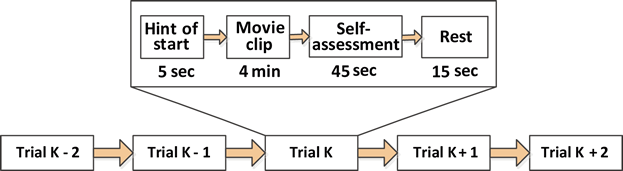	

### Subjects
Fifteen Chinese subjects (7 males and 8 females; MEAN: 23.27, STD: 2.37) participated in the experiments. In order to protect personal privacy, we have hidden their names and indicate each subject with a number from 1 to 15.

## Problem Statement
So since I described earlier that I have been provided with the EEG signals from brainwave scans having **2548 electrodes** each having an activity measured in microVolts and there's another column which is the **prediction column** containing emotions as **Positive,Negative or Neutral** That literally means that we currently have 2549 columns. Isn't that a huge number?

The flow of this Analysis has been decided to be:
- First I have imported the dataset of SEED EEG emotions from my local directory.

- I then used **wavelet transform** to my signals which decomposes a waveform into a set of wavelets and is highly recommended when dealing with signals having short intervals of characteristic oscillations.
I even tried **Fourier Transform** but it didn't seem to work probably because it's not good with signals having short intervals of characteristic oscillations since it captures global frequency information, meaning frequencies that persist over an entire signal which doesn't hold good for these signals
After wavelet transform my signal reduced from **2548** electrode signals to a mere **319** signals which is a tremendous dimensionality reduction too.

- Then I utilised Recursive Feature Elimination which works as follows:-
Select features by recursively considering smaller and smaller sets of features. First, the estimator which I have taken to be Random Forest is trained on the initial set of features and the importance of each feature is obtained either through any specific attribute or callable. Then, the least important features are pruned from current set of features. That procedure is recursively repeated on the pruned set until the desired number of features which I have set as **10** to select is eventually reached.
So now I have made my features as only 10 columns of signals, this is a huge transition from **2548 to 319 to 10.**

- Next step is the train test split done as 70-30 ratio 

- I made it as a supervised learning problem, labels are predicted using predictors andd built a model consisting of only an LSTM and a Dense Layer. So model was trained and validated and it predicted emotions with 89.5 % accuracy on the test set.

- In the Last step,I plotted a confusion matrix and a classification report which indicates 89% for both precision and recall and hence f1 score.

In [1]:
from google.colab import drive
drive.mount('/drive')

Mounted at /drive


In [2]:
# This program aims to accurately predict the emotional states of a subject while watching various movie scenes using their EEG readings and an LSTM
# recurrent neural network
import numpy as np
import pandas as pd
import pywt
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
from sklearn.model_selection import train_test_split 
from sklearn.metrics import confusion_matrix, classification_report

In [3]:
# #opening up the emotions dataset
df = pd.read_csv('emotions (4).csv')

In [6]:
df.head()

,Unnamed: 0,# mean_0_a,mean_1_a,mean_2_a,mean_3_a,mean_4_a,mean_d_0_a,mean_d_1_a,mean_d_2_a,mean_d_3_a,mean_d_4_a,mean_d_0_a2,mean_d_1_a2,mean_d_2_a2,mean_d_3_a2,mean_d_4_a2,mean_d_5_a,mean_d_6_a,mean_d_7_a,mean_d_8_a,mean_d_9_a,mean_d_10_a,mean_d_11_a,mean_d_12_a,mean_d_13_a,mean_d_14_a,mean_d_15_a,mean_d_16_a,mean_d_17_a,mean_d_18_a,mean_d_19_a,mean_d_20_a,mean_d_21_a,mean_d_22_a,mean_d_23_a,mean_d_24_a,mean_d_25_a,mean_d_26_a,mean_d_27_a,mean_d_28_a,...,fft_711_b,fft_712_b,fft_713_b,fft_714_b,fft_715_b,fft_716_b,fft_717_b,fft_718_b,fft_719_b,fft_720_b,fft_721_b,fft_722_b,fft_723_b,fft_724_b,fft_725_b,fft_726_b,fft_727_b,fft_728_b,fft_729_b,fft_730_b,fft_731_b,fft_732_b,fft_733_b,fft_734_b,fft_735_b,fft_736_b,fft_737_b,fft_738_b,fft_739_b,fft_740_b,fft_741_b,fft_742_b,fft_743_b,fft_744_b,fft_745_b,fft_746_b,fft_747_b,fft_748_b,fft_749_b,label
0,0,4.62,30.3,-356.0,15.6,26.3,1.070,0.411,-15.70,2.06,3.15,2.15,29.5,-353.0,14.40,21.5,5.98,30.7,-343.0,14.7,27.9,3.17,32.2,-368.0,15.9,36.4,7.08,28.8,-359.0,17.3,19.6,-3.8300,-1.230,-10.80000,-0.363,-6.41,-1.03,-2.780,14.60,-1.540,...,30.90,-24.4,-24.4,30.90,-442.0,388.0,-197.0,-197.0,388.0,-564.0,500.00,-245.00,-245.00,500.00,-88.8,214.0,-88.8,-88.8,214.0,-606.0,509.000,-261.0,-261.0,509.000,-399.0,374.0,-185.00,-185.00,374.0,74.3,23.5,20.3,20.3,23.5,-215.0,280.00,-162.00,-162.00,280.00,NEGATIVE
1,1,28.80,33.1,32.0,25.8,22.8,6.550,1.680,2.88,3.83,-4.82,25.60,32.8,29.6,21.50,17.4,25.50,31.7,31.5,26.2,32.9,31.80,33.1,33.2,28.5,26.8,32.40,34.7,33.8,27.0,14.2,0.0342,1.100,-1.87000,-4.690,-15.40,-6.22,-0.328,-3.53,-6.980,...,-5.99,-19.1,-19.1,-5.99,163.0,-11.0,-10.7,-10.7,-11.0,117.0,-3.93,17.90,17.90,-3.93,112.0,-13.9,25.5,25.5,-13.9,225.0,-0.968,-27.7,-27.7,-0.968,97.4,-19.0,40.70,40.70,-19.0,130.0,-23.3,-21.8,-21.8,-23.3,182.0,2.57,-31.60,-31.60,2.57,NEUTRAL
2,2,8.90,29.4,-416.0,16.7,23.7,79.900,3.360,90.20,89.90,2.03,7.75,30.1,-441.0,9.89,25.3,-68.90,25.3,-481.0,-65.4,20.0,79.80,31.0,-408.0,91.9,29.5,18.80,31.1,-335.0,32.2,19.9,76.6000,4.850,39.90000,75.300,5.27,-72.00,-0.843,-33.00,-82.000,...,585.00,-285.0,-285.0,585.00,-94.3,183.0,-110.0,-110.0,183.0,-133.0,200.00,-72.00,-72.00,200.00,-356.0,295.0,-158.0,-158.0,295.0,-251.0,255.000,-95.7,-95.7,255.000,-177.0,159.0,-48.80,-48.80,159.0,-534.0,462.0,-233.0,-233.0,462.0,-267.0,281.00,-148.00,-148.00,281.00,POSITIVE
3,3,14.90,31.6,-143.0,19.8,24.3,-0.584,-0.284,8.82,2.30,-1.97,17.30,32.0,-148.0,20.40,22.8,13.20,31.5,-147.0,16.9,27.7,15.70,30.7,-142.0,20.7,22.8,13.60,32.2,-135.0,21.2,23.8,4.1500,0.556,-0.35400,3.460,-4.96,1.63,1.330,-5.83,-0.298,...,249.00,-146.0,-146.0,249.00,359.0,-146.0,13.7,13.7,-146.0,119.0,-7.64,-7.17,-7.17,-7.64,-296.0,316.0,-218.0,-218.0,316.0,322.0,-113.000,38.4,38.4,-113.000,245.0,-61.9,-5.08,-5.08,-61.9,-183.0,299.0,-243.0,-243.0,299.0,132.0,-12.40,9.53,9.53,-12.40,POSITIVE
4,4,28.30,31.3,45.2,27.3,24.5,34.800,-5.790,3.06,41.40,5.52,26.10,34.3,43.7,23.70,20.6,-3.87,34.1,43.7,-10.0,22.9,59.40,26.7,60.3,64.7,26.9,32.30,30.1,33.6,31.6,27.7,30.0000,0.276,-0.00677,33.700,-2.36,-33.30,7.640,-16.60,-41.100,...,18.30,-11.9,-11.9,18.30,159.0,-18.2,-25.6,-25.6,-18.2,194.0,32.70,-54.50,-54.50,32.70,154.0,26.4,-56.4,-56.4,26.4,252.0,9.940,-37.4,-37.4,9.940,172.0,15.9,-7.25,-7.25,15.9,114.0,12.0,38.1,38.1,12.0,119.0,-17.60,23.90,23.90,-17.60,NEUTRAL


In [7]:
df.drop(['Unnamed: 0'],axis=1,inplace=True)
df.head()

,# mean_0_a,mean_1_a,mean_2_a,mean_3_a,mean_4_a,mean_d_0_a,mean_d_1_a,mean_d_2_a,mean_d_3_a,mean_d_4_a,mean_d_0_a2,mean_d_1_a2,mean_d_2_a2,mean_d_3_a2,mean_d_4_a2,mean_d_5_a,mean_d_6_a,mean_d_7_a,mean_d_8_a,mean_d_9_a,mean_d_10_a,mean_d_11_a,mean_d_12_a,mean_d_13_a,mean_d_14_a,mean_d_15_a,mean_d_16_a,mean_d_17_a,mean_d_18_a,mean_d_19_a,mean_d_20_a,mean_d_21_a,mean_d_22_a,mean_d_23_a,mean_d_24_a,mean_d_25_a,mean_d_26_a,mean_d_27_a,mean_d_28_a,mean_d_29_a,...,fft_711_b,fft_712_b,fft_713_b,fft_714_b,fft_715_b,fft_716_b,fft_717_b,fft_718_b,fft_719_b,fft_720_b,fft_721_b,fft_722_b,fft_723_b,fft_724_b,fft_725_b,fft_726_b,fft_727_b,fft_728_b,fft_729_b,fft_730_b,fft_731_b,fft_732_b,fft_733_b,fft_734_b,fft_735_b,fft_736_b,fft_737_b,fft_738_b,fft_739_b,fft_740_b,fft_741_b,fft_742_b,fft_743_b,fft_744_b,fft_745_b,fft_746_b,fft_747_b,fft_748_b,fft_749_b,label
0,4.62,30.3,-356.0,15.6,26.3,1.070,0.411,-15.70,2.06,3.15,2.15,29.5,-353.0,14.40,21.5,5.98,30.7,-343.0,14.7,27.9,3.17,32.2,-368.0,15.9,36.4,7.08,28.8,-359.0,17.3,19.6,-3.8300,-1.230,-10.80000,-0.363,-6.41,-1.03,-2.780,14.60,-1.540,-14.900000,...,30.90,-24.4,-24.4,30.90,-442.0,388.0,-197.0,-197.0,388.0,-564.0,500.00,-245.00,-245.00,500.00,-88.8,214.0,-88.8,-88.8,214.0,-606.0,509.000,-261.0,-261.0,509.000,-399.0,374.0,-185.00,-185.00,374.0,74.3,23.5,20.3,20.3,23.5,-215.0,280.00,-162.00,-162.00,280.00,NEGATIVE
1,28.80,33.1,32.0,25.8,22.8,6.550,1.680,2.88,3.83,-4.82,25.60,32.8,29.6,21.50,17.4,25.50,31.7,31.5,26.2,32.9,31.80,33.1,33.2,28.5,26.8,32.40,34.7,33.8,27.0,14.2,0.0342,1.100,-1.87000,-4.690,-15.40,-6.22,-0.328,-3.53,-6.980,-9.370000,...,-5.99,-19.1,-19.1,-5.99,163.0,-11.0,-10.7,-10.7,-11.0,117.0,-3.93,17.90,17.90,-3.93,112.0,-13.9,25.5,25.5,-13.9,225.0,-0.968,-27.7,-27.7,-0.968,97.4,-19.0,40.70,40.70,-19.0,130.0,-23.3,-21.8,-21.8,-23.3,182.0,2.57,-31.60,-31.60,2.57,NEUTRAL
2,8.90,29.4,-416.0,16.7,23.7,79.900,3.360,90.20,89.90,2.03,7.75,30.1,-441.0,9.89,25.3,-68.90,25.3,-481.0,-65.4,20.0,79.80,31.0,-408.0,91.9,29.5,18.80,31.1,-335.0,32.2,19.9,76.6000,4.850,39.90000,75.300,5.27,-72.00,-0.843,-33.00,-82.000,-4.200000,...,585.00,-285.0,-285.0,585.00,-94.3,183.0,-110.0,-110.0,183.0,-133.0,200.00,-72.00,-72.00,200.00,-356.0,295.0,-158.0,-158.0,295.0,-251.0,255.000,-95.7,-95.7,255.000,-177.0,159.0,-48.80,-48.80,159.0,-534.0,462.0,-233.0,-233.0,462.0,-267.0,281.00,-148.00,-148.00,281.00,POSITIVE
3,14.90,31.6,-143.0,19.8,24.3,-0.584,-0.284,8.82,2.30,-1.97,17.30,32.0,-148.0,20.40,22.8,13.20,31.5,-147.0,16.9,27.7,15.70,30.7,-142.0,20.7,22.8,13.60,32.2,-135.0,21.2,23.8,4.1500,0.556,-0.35400,3.460,-4.96,1.63,1.330,-5.83,-0.298,0.000777,...,249.00,-146.0,-146.0,249.00,359.0,-146.0,13.7,13.7,-146.0,119.0,-7.64,-7.17,-7.17,-7.64,-296.0,316.0,-218.0,-218.0,316.0,322.0,-113.000,38.4,38.4,-113.000,245.0,-61.9,-5.08,-5.08,-61.9,-183.0,299.0,-243.0,-243.0,299.0,132.0,-12.40,9.53,9.53,-12.40,POSITIVE
4,28.30,31.3,45.2,27.3,24.5,34.800,-5.790,3.06,41.40,5.52,26.10,34.3,43.7,23.70,20.6,-3.87,34.1,43.7,-10.0,22.9,59.40,26.7,60.3,64.7,26.9,32.30,30.1,33.6,31.6,27.7,30.0000,0.276,-0.00677,33.700,-2.36,-33.30,7.640,-16.60,-41.100,-6.290000,...,18.30,-11.9,-11.9,18.30,159.0,-18.2,-25.6,-25.6,-18.2,194.0,32.70,-54.50,-54.50,32.70,154.0,26.4,-56.4,-56.4,26.4,252.0,9.940,-37.4,-37.4,9.940,172.0,15.9,-7.25,-7.25,15.9,114.0,12.0,38.1,38.1,12.0,119.0,-17.60,23.90,23.90,-17.60,NEUTRAL


In [8]:
df_copy=df.copy()

In [9]:
#Performing the wavelet transform of the eeg signals from our dataframe which are every column but the last one.
db1 = pywt.Wavelet('db1')
coeffs = pywt.wavedec(np.array(df_copy.drop(['label'],axis=1)), db1, level=3)
wavel = coeffs[0]

In [10]:
wavel

array([[-1.03732211e+02, -9.69655529e+01, -2.07334315e+02, ...,
        -1.13137085e+02,  4.80479058e+01,  1.66877200e+02],
       [ 5.43093363e+01,  5.35315189e+01,  8.79994389e+01, ...,
         1.01386385e+02,  8.60902506e+01, -4.10546197e+01],
       [-5.79261875e+01, -1.21951171e+02, -2.49750115e+02, ...,
         2.82842712e-01, -8.23072293e+01,  1.88090404e+02],
       ...,
       [-5.65922306e+01, -6.88050253e+01, -1.48079827e+02, ...,
        -1.81090047e+01,  2.71175451e+02, -2.53851334e+02],
       [-8.09354422e+01, -6.93919240e+01, -1.65420560e+02, ...,
         6.84903628e+01, -1.89568257e+02,  3.97394011e+02],
       [ 5.58084027e+01,  5.90717005e+01,  8.15647672e+01, ...,
         1.05153849e+02,  9.52119281e+01,  2.27546962e+01]])

In [11]:
df.shape

(2132, 2549)

**As it can be seen that wavelet transform has reduced the dimensionality of our dataset from 2549 columns to 319 columns**

In [12]:
wavel.shape

(2132, 319)

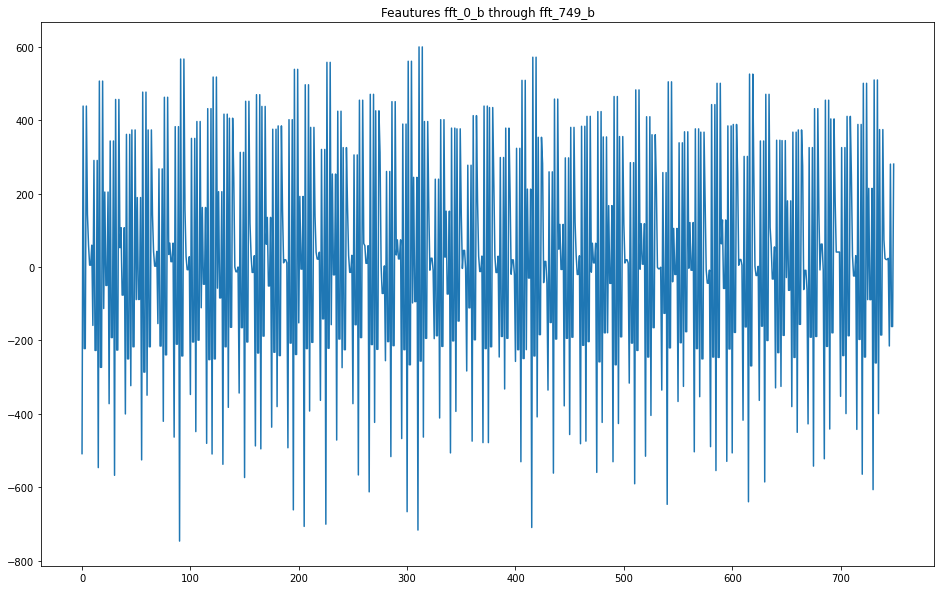

In [13]:
#plots of features from fft_0_b through fft-749_b signals
sample = df.loc[0, 'fft_0_b':'fft_749_b']
plt.figure(figsize=(16, 10))
plt.plot(range(len(sample)), sample)
plt.title('Feautures fft_0_b through fft_749_b')
plt.show()

In [14]:
#value counts of emotion label column
df['label'].value_counts()

NEUTRAL     716
NEGATIVE    708
POSITIVE    708
Name: label, dtype: int64

In [15]:
#replacing the labels with integer values so as to create a column
label_mapping = {'NEGATIVE': 0, 'NEUTRAL': 1, 'POSITIVE': 2}

In [16]:
#Performing Recursive Feature Elimination on our still huge dataset having 319 columns
X,Y=wavel,df['label']
from sklearn.feature_selection import RFE
from sklearn.ensemble import RandomForestClassifier
model=RandomForestClassifier()
rfe = RFE(model, 10)
fit = rfe.fit(X, Y)

In [17]:
print("Num Features: %d" % fit.n_features_)
u=np.where(fit.support_==True)[0]
#u indicates the indices of top 10 features after RFE
u

Num Features: 10


array([  0,   1,   2,  20,  26, 160, 162, 185, 188, 222])

In [18]:
wavel.T[0].shape

(2132,)

In [19]:
selected_elements = [wavel.T[index] for index in u] 
selected_elements

[array([-103.73221125,   54.30933633,  -57.92618751, ...,  -56.59223057,
         -80.93544217,   55.80840271]),
 array([ -96.9655529 ,   53.53151887, -121.95117102, ...,  -68.80502534,
         -69.39192397,   59.0717005 ]),
 array([-207.33431485,   87.99943892, -249.75011512, ..., -148.07982724,
        -165.42056039,   81.56476721]),
 array([-528.36432904,    9.29315087, -634.58944524, ..., -590.66750753,
        -570.73416737,    4.38406204]),
 array([ 6907.41607909,   -14.1916331 , 12402.08725659, ...,
         5228.58088533,  5157.65453964,   -25.59372995]),
 array([-105.02374178,   45.254834  ,  -70.16267036, ...,  -60.82072912,
         -82.67138932,   41.9240075 ]),
 array([-199.65867074,   79.16060415, -183.61335721, ..., -104.26289489,
        -161.96634376,   83.79215357]),
 array([6.65417180e+03, 9.75736647e+00, 7.47537733e+03, ...,
        3.48466500e+03, 4.40256703e+03, 3.32693741e+00]),
 array([10667.76645437,   -39.35756344, 15057.94497138, ...,
         6126.90348229,

In [20]:
selected_elements=np.array(selected_elements)
selected_elements=selected_elements.T
selected_elements.shape

(2132, 10)

**Now after RFE, our number of columns are down to 10. Isn't that impeccable that we have now reduced our number of columns from 2549 to 10.**

In [21]:
Y=df.replace(label_mapping)['label']
Y

0       0
1       1
2       2
3       2
4       1
       ..
2127    1
2128    2
2129    0
2130    0
2131    1
Name: label, Length: 2132, dtype: int64

In [28]:
#calling the train-test-split function
X_train, X_test, y_train, y_test = train_test_split(selected_elements, Y, train_size=0.7, random_state=123)

In [29]:
inputs = tf.keras.Input(shape=(X_train.shape[1],))
expand_dims = tf.expand_dims(inputs, axis=2)
lstm = tf.keras.layers.LSTM(256, return_sequences=True)(expand_dims)
flatten = tf.keras.layers.Flatten()(lstm)
outputs = tf.keras.layers.Dense(3, activation='softmax')(flatten)
model = tf.keras.Model(inputs=inputs, outputs=outputs)
print(model.summary())

Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         [(None, 10)]              0         
_________________________________________________________________
tf.expand_dims_1 (TFOpLambda (None, 10, 1)             0         
_________________________________________________________________
lstm_1 (LSTM)                (None, 10, 256)           264192    
_________________________________________________________________
flatten_1 (Flatten)          (None, 2560)              0         
_________________________________________________________________
dense_1 (Dense)              (None, 3)                 7683      
Total params: 271,875
Trainable params: 271,875
Non-trainable params: 0
_________________________________________________________________
None


In [30]:
model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])

history = model.fit(X_train,y_train,validation_split=0.2,batch_size=32,epochs=50,callbacks=[tf.keras.callbacks.EarlyStopping(
            monitor='val_loss',
            patience=5,
            restore_best_weights=True
        )])

Epoch 1/50
38/38 [==============================] - 3s 48ms/step - loss: 0.2970 - accuracy: 0.8910 - val_loss: 0.3188 - val_accuracy: 0.8696
Epoch 2/50
38/38 [==============================] - 1s 37ms/step - loss: 0.2453 - accuracy: 0.9179 - val_loss: 0.3165 - val_accuracy: 0.8930
Epoch 3/50
38/38 [==============================] - 1s 36ms/step - loss: 0.2128 - accuracy: 0.9246 - val_loss: 0.2920 - val_accuracy: 0.8963
Epoch 4/50
38/38 [==============================] - 1s 37ms/step - loss: 0.1997 - accuracy: 0.9338 - val_loss: 0.2819 - val_accuracy: 0.8963
Epoch 5/50
38/38 [==============================] - 1s 37ms/step - loss: 0.1991 - accuracy: 0.9279 - val_loss: 0.2865 - val_accuracy: 0.8896
Epoch 6/50
38/38 [==============================] - 2s 42ms/step - loss: 0.1953 - accuracy: 0.9313 - val_loss: 0.3124 - val_accuracy: 0.8930
Epoch 7/50
38/38 [==============================] - 1s 38ms/step - loss: 0.1893 - accuracy: 0.9355 - val_loss: 0.2904 - val_accuracy: 0.8997
Epoch 8/50
38

In [31]:
model_acc = model.evaluate(X_test, y_test, verbose=0)[1]
print("Test Accuracy: {:.3f}%".format(model_acc * 100))

Test Accuracy: 89.531%


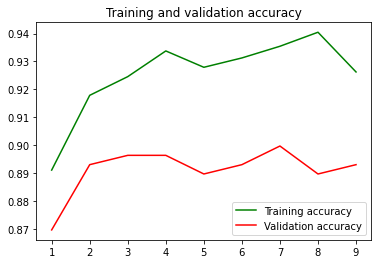

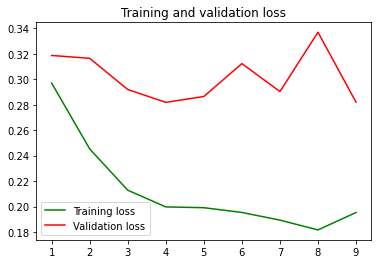

In [32]:
# Plot results for accuracies and losses with epochs on x axis
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc)+1)

plt.plot(epochs, acc, 'g', label='Training accuracy')
plt.plot(epochs, val_acc, 'r', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'g', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

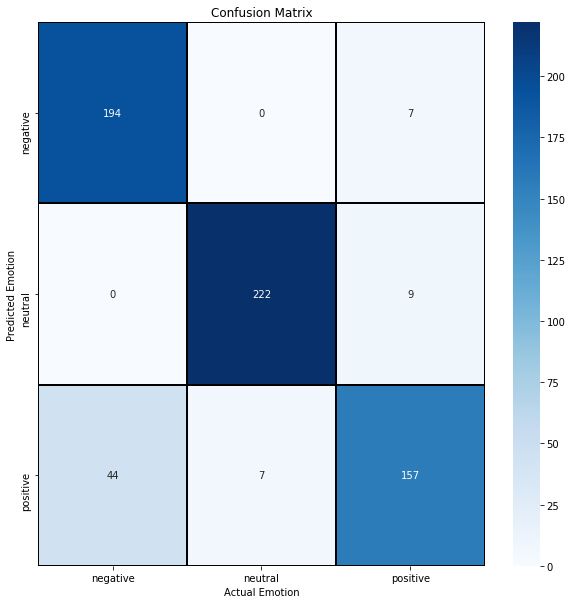

Classification Report:
----------------------
               precision    recall  f1-score   support

    NEGATIVE       0.82      0.97      0.88       201
     NEUTRAL       0.97      0.96      0.97       231
    POSITIVE       0.91      0.75      0.82       208

    accuracy                           0.90       640
   macro avg       0.90      0.89      0.89       640
weighted avg       0.90      0.90      0.89       640



In [33]:
#plotting a confusion matrix for three labels(positive,neutral and negative)
y_pred = np.array(list(map(lambda x: np.argmax(x), model.predict(X_test))))
cm = confusion_matrix(y_test, y_pred)
clr = classification_report(y_test, y_pred, target_names=label_mapping.keys())
cm1 = pd.DataFrame(cm , index = ['negative','neutral','positive'] , columns = ['negative','neutral','positive'])
plt.figure(figsize = (10,10))
ax=sns.heatmap(cm1,cmap= "Blues", linecolor = 'black' , linewidth = 1 , annot = True, fmt='')
ax.set(xlabel="Actual Emotion", ylabel = "Predicted Emotion")
plt.title("Confusion Matrix")
plt.show()

print("Classification Report:\n----------------------\n", clr)